# Library

In [82]:
## For loading the pickle
import pandas as pd
## Numpy for the heatmap
import numpy as np
## Displaying the heatmap
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
## Clear Output
from IPython.display import clear_output

# Data Spawn

In [83]:
spawn_region = 100
## Read the dataframe
df = pd.read_pickle("../../data/ufficial/pickle/kills.pkl")\
                    .dropna(how='any',axis=0)
## Taking only the values we need
data_us = df[((df.x_death > -spawn_region) 
              & (df.x_death < spawn_region)) 
              & ((df.z_death > -spawn_region) 
              & (df.z_death < spawn_region))]
## Values we want
#[["x_death", "z_death"]]

Text(0, 0.5, 'z')

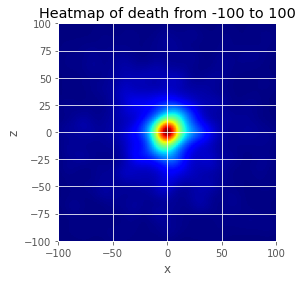

In [84]:
data = np.vstack([data_us["x_death"].values, data_us["z_death"].values])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(spawn_region, -spawn_region, 100)
ygrid = np.linspace(spawn_region, -spawn_region, 100)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower',
           extent=[-spawn_region, spawn_region, -spawn_region, spawn_region],
           cmap=plt.cm.jet)
## informations
plt.title('Heatmap of death from -100 to 100')
plt.xlabel('x')
plt.ylabel('z')

# Data World
## Y Death

In [85]:
yClass = pd.DataFrame({
    "Y": [],
    "Perc": []
})
## Print it 
for value, perc in (df.y_death.value_counts(normalize=True) * 100).items():
    print("Y: %f Perc: %s %%" % (value, round(perc, 3)))
    yClass = yClass.append({"Perc": perc, "Y": value}, ignore_index=True)
clear_output()

In [86]:
yClass = yClass.set_index("Y")
## Export this
yClass.to_csv("../../results/kills/yClass.csv")

## Top 5 y

In [87]:
## Algo for creating the graph
def createGraph(top5):
    ## Use this style for the plot
    plt.style.use("ggplot")
    ## Incr the size
    plt.figure(figsize=(15,7))
    ## Put it on the graph
    plt.barh(top5.index.astype(str), top5.values)
    ## Order it
    plt.gca().invert_yaxis()

    ## Add %
    for index, value in enumerate(top5):
        plt.text(value, index, " %" + str(value) )

    ## Show
    plt.show()

In [88]:
## Take first 5 y
createGraph((df.y_death.value_counts(normalize=True) * 100)[:5].round(3))
clear_output()

## Lowest and Highest Y, X and Z

In [89]:
print("X: Min: %f Max: %f\n" \
      "Y: Min: %f Max: %f\n" \
      "Z: Min: %f Max: %f" % 
      (df.x_death.min(), df.x_death.max(),
       df.y_death.min(), df.y_death.max(),
       df.z_death.min(), df.z_death.max()))
clear_output()

## Most kills + Death

### Get Data

In [90]:
total_kills = len(df["killer_name"])

In [116]:
killers = df["killer_name"].value_counts()
victims = df["victim_name"].value_counts()
items = df["weapon"].value_counts()

### N^ registred kills

In [118]:
registredKills = df["killer_name"].value_counts().sum()
print(registredKills)

47388


### Killer Data

In [133]:
kClass = pd.DataFrame({
    "Killer": [],
    "Num": [],
    "Perc": []
})
## Print killers 
for value, num in killers.items():
    print("Killer: %s Num: %d Perc: %f %%" % (value, num, num / registredKills * 100))
    kClass = kClass.append({"Num": num, "Perc": num / registredKills * 100, "Killer": value}, ignore_index=True)
clear_output()

In [134]:
kClass = kClass.set_index("Killer")
## Export this
kClass.to_csv("../../results/kills/killerClass.csv")

In [107]:
## Take first 5 killers
createGraph(((killer / registredKills * 100)[:5].round(3))[:5].round(3))
clear_output()

### Victim Data

In [122]:
vClass = pd.DataFrame({
    "Victim": [],
    "Num": [],
    "Perc": []
})
## Print killers 
for value, num in victims.items():
    print("Victim: %s Num: %d Perc: %f %%" % (value, num, num / registredKills * 100))
    vClass = vClass.append({"Num": num, "Perc": num / registredKills * 100, "Victim": value}, ignore_index=True)
clear_output()

In [125]:
vClass = vClass.set_index("Victim")
## Export this
vClass.to_csv("../../results/kills/victimClass.csv")

In [144]:
## Take first 5 weapons
createGraph(((victims / registredKills * 100)[:5].round(3))[:5].round(3))
clear_output()

In [136]:
iClass = pd.DataFrame({
    "Item": [],
    "Num": [],
    "Perc": []
})
## Print killers 
for value, num in items.items():
    print("Item: %s Num: %d Perc: %f %%" % (value, num, num / registredKills * 100))
    iClass = iClass.append({"Num": num, "Perc": num / registredKills * 100, "Item": value}, ignore_index=True)
clear_output()

In [137]:
iClass = iClass.set_index("Item")
## Export this
iClass.to_csv("../../results/kills/itemClass.csv")

In [145]:
## Take first 5 weapons
createGraph(((items / registredKills * 100)[:5].round(3))[:5].round(3))
clear_output()